# Used car price prediction

In [146]:
# packages
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# stats
from scipy import stats

# preprocessing
from sklearn.preprocessing import StandardScaler

# cross validataion
from sklearn.model_selection import (train_test_split, RandomizedSearchCV)

# ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor

# power transformation
from sklearn.preprocessing import PowerTransformer

# warnings
import warnings
warnings.filterwarnings('ignore')

# plotly offline
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)

In [147]:
df = pd.read_csv('../input/used-cars-dataset-from-cardekhocom/cardekho_imputated.csv',index_col=0)

In [148]:
df.head()

,car_name,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,7.110000e+05,7.480000e+05,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,8.540829e+05,1.307926e+06,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,3.570039e+05,4.654015e+05,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,1.014000e+06,1.379000e+06,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   min_cost_price     15411 non-null  float64
 4   max_cost_price     15411 non-null  float64
 5   vehicle_age        15411 non-null  int64  
 6   km_driven          15411 non-null  int64  
 7   seller_type        15411 non-null  object 
 8   fuel_type          15411 non-null  object 
 9   transmission_type  15411 non-null  object 
 10  mileage            15411 non-null  float64
 11  engine             15411 non-null  int64  
 12  max_power          15411 non-null  float64
 13  seats              15411 non-null  int64  
 14  selling_price      15411 non-null  int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 1.9+ MB


In [150]:
# col type
num_cols = ['min_cost_price','max_cost_price','vehicle_age','km_driven','mileage','engine','max_power','selling_price']
cat_cols = ['brand','model','seller_type','fuel_type','transmission_type','seats']             

In [151]:
df.drop(['car_name'],axis=1,inplace=True)

# stats

In [152]:
round(df[num_cols].describe().T,2)

,count,mean,std,min,25%,50%,75%,max
min_cost_price,15411.0,5892971.12,56698513.93,311000.0,668000.00,855000.00,1284000.0,9.880000e+08
max_cost_price,15411.0,1962623.92,2889635.64,436000.0,872866.67,1206000.00,1743000.0,9.110000e+07
vehicle_age,15411.0,6.04,3.01,0.0,4.00,6.00,8.0,2.900000e+01
km_driven,15411.0,55616.48,51618.55,100.0,30000.00,50000.00,70000.0,3.800000e+06
mileage,15411.0,19.70,4.17,4.0,17.00,19.67,22.7,3.354000e+01
engine,15411.0,1486.06,521.11,793.0,1197.00,1248.00,1582.0,6.592000e+03
max_power,15411.0,100.59,42.97,38.4,74.00,88.50,117.3,6.260000e+02
selling_price,15411.0,774971.12,894128.36,40000.0,385000.00,556000.00,825000.0,3.950000e+07


# skewness

In [153]:
name_v=[]
sk_n=[]

for i in df[num_cols].columns:
    name_v.append(i)
    sk_n.append(df[i].skew())
    
skewness_df = pd.DataFrame({'variable_name':name_v,'skewness':sk_n})
skewness_df 

,variable_name,skewness
0,min_cost_price,13.952025
1,max_cost_price,7.928051
2,vehicle_age,0.833712
3,km_driven,28.172711
4,mileage,0.104961
5,engine,1.666467
6,max_power,2.485129
7,selling_price,10.047048


In [154]:
# replacing 0 to median vehicle age

df['vehicle_age'].replace(0,df['vehicle_age'].median(),inplace=True)

# replacing 0 to median seats
df['seats'].replace(0,df['seats'].median(),inplace=True)

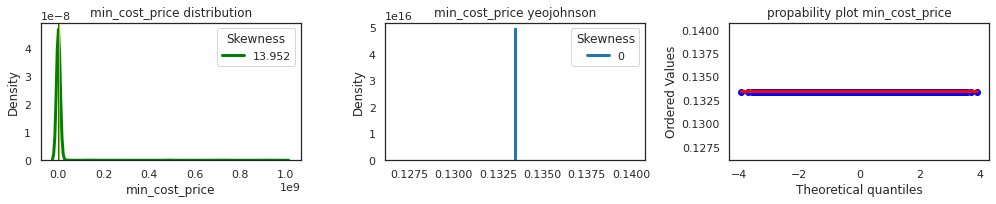

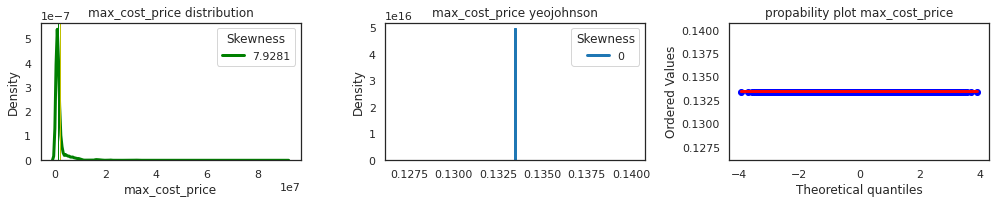

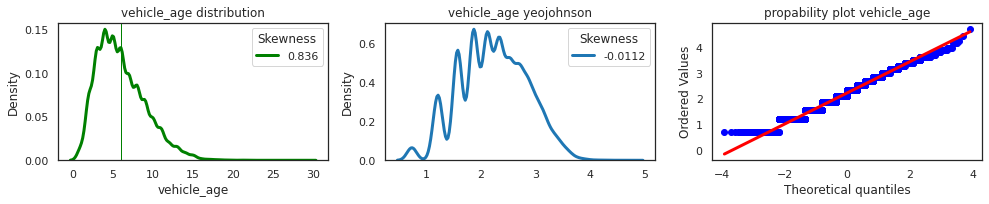

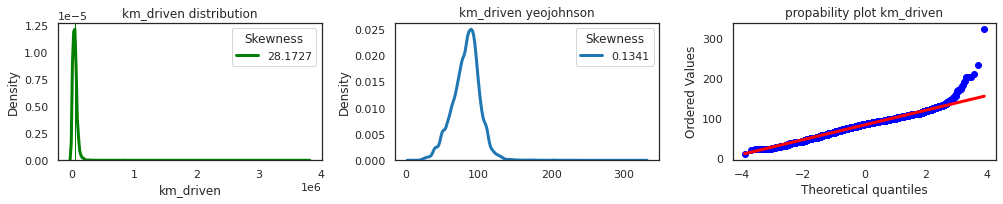

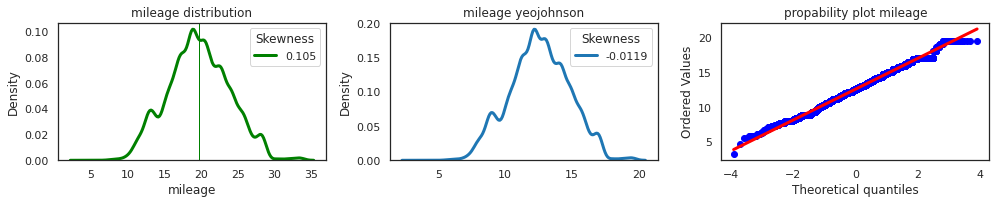

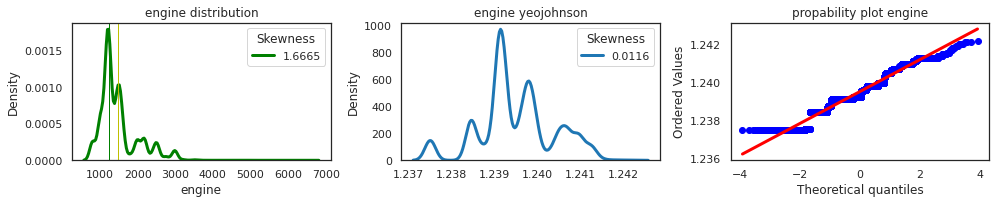

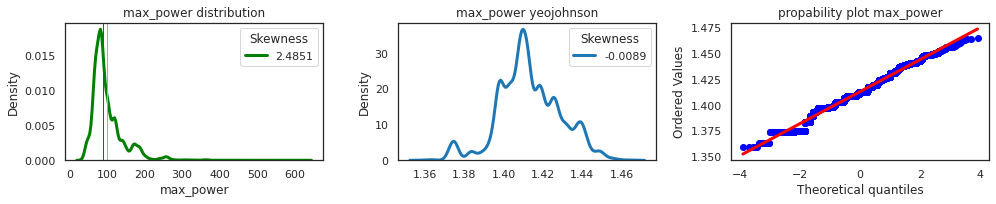

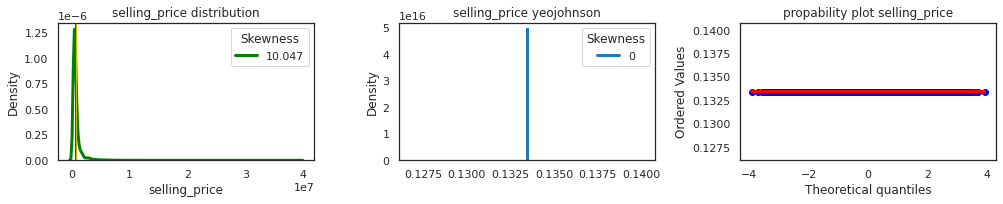

In [155]:
# checking skewness of variables and comparing the yeojohnson power tranformation

for i in num_cols:
   
    fig, ax = plt.subplots(1,3,figsize=(14, 3))

    sns.set_style('white')
    sns.set_context(context = 'notebook',font_scale=1,rc={"lines.linewidth": 3})
    
    
    skew_b = df[i].skew()
    skew_after = pd.Series(stats.yeojohnson(df[i])[0])
    skew_after = skew_after.skew()
    
    sns.kdeplot(df[i],color='green',ax=ax[0]);
    sns.kdeplot(stats.yeojohnson(df[i])[0],ax=ax[1])
    
    stats.probplot(pd.Series(stats.yeojohnson(df[i])[0]),dist="norm",plot=plt)
    
    
    ax[0].title.set_text(f'{i} distribution');
    ax[1].title.set_text(f'{i} yeojohnson');
    ax[2].title.set_text(f'propability plot {i}');     
        
    ax[0].axvline(df[i].mean(), color='y', linewidth=1)
    ax[0].axvline(df[i].median(), color='g', linewidth=1)
    
    ax[0].legend([round(skew_b,4)],title=('Skewness'))
    ax[1].legend([round(skew_after,4)],title=('Skewness'))
            
    plt.tight_layout()    

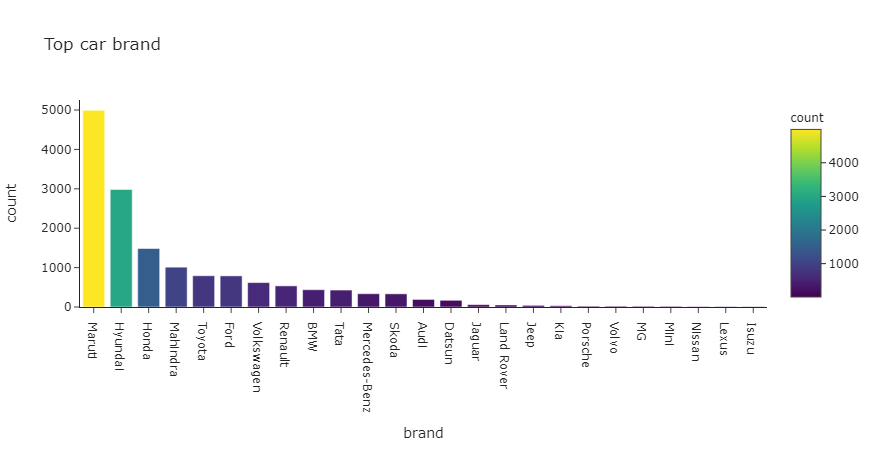

In [156]:
brand_df =df['brand'].value_counts().reset_index()
brand_df.columns = ['brand','count']

px.bar(brand_df[0:25],y='count',x='brand',title='Top car brand',template='simple_white',color='count')

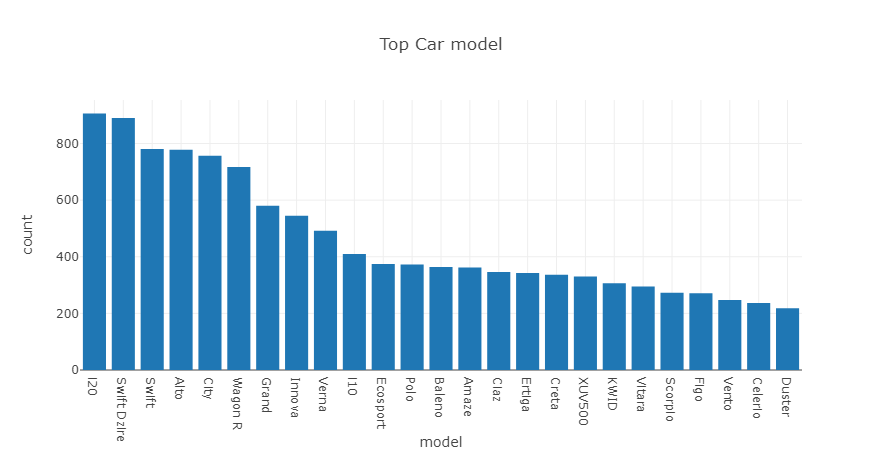

In [157]:
model_df =df['model'].value_counts().reset_index()
model_df.columns = ['model','count']

px.bar(model_df[0:25],y='count',x='model',title='Top Car model',template='gridon')

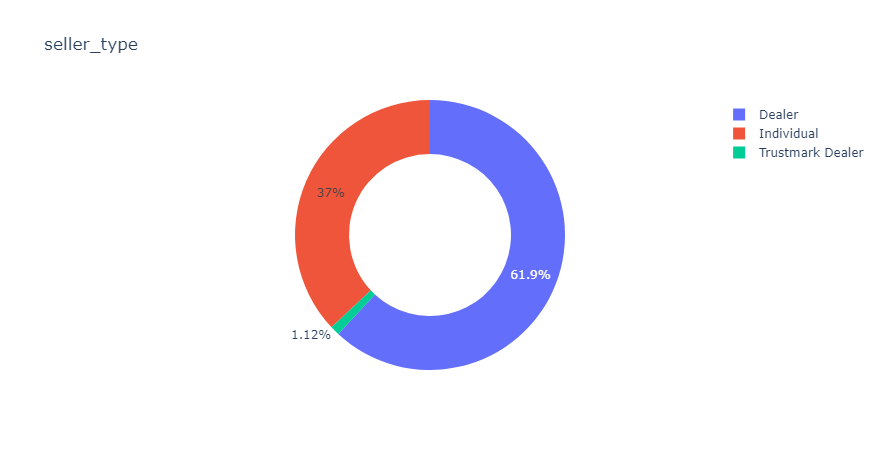

In [158]:
car_list =['seller_type','fuel_type','transmission_type','seats']
    
seller_type_df =df['seller_type'].value_counts().reset_index()
seller_type_df.columns = ['seller_type','count']

px.pie(seller_type_df,values='count',names='seller_type',title='seller_type',width=550,height=450,hole=.60)

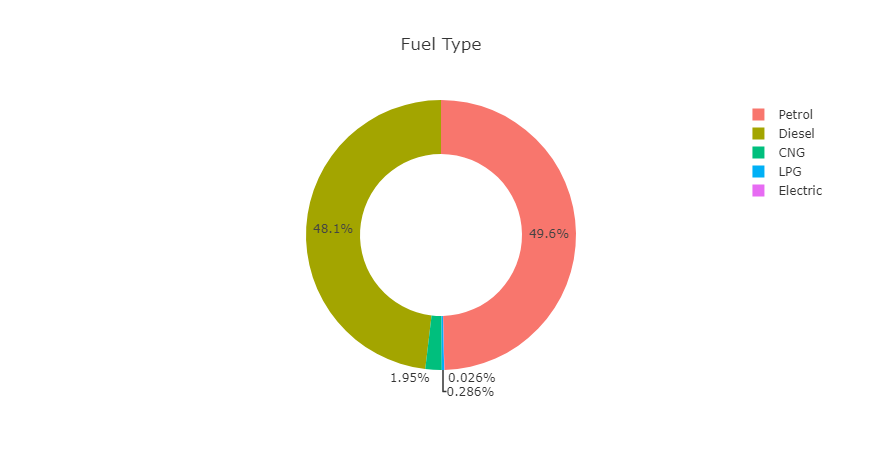

In [159]:
fuel_df =df['fuel_type'].value_counts().reset_index()
fuel_df.columns = ['Fuel_type','count']

px.pie(fuel_df,values='count',names='Fuel_type',title='Fuel Type',template='ggplot2',width=550,height=450,hole=.60)

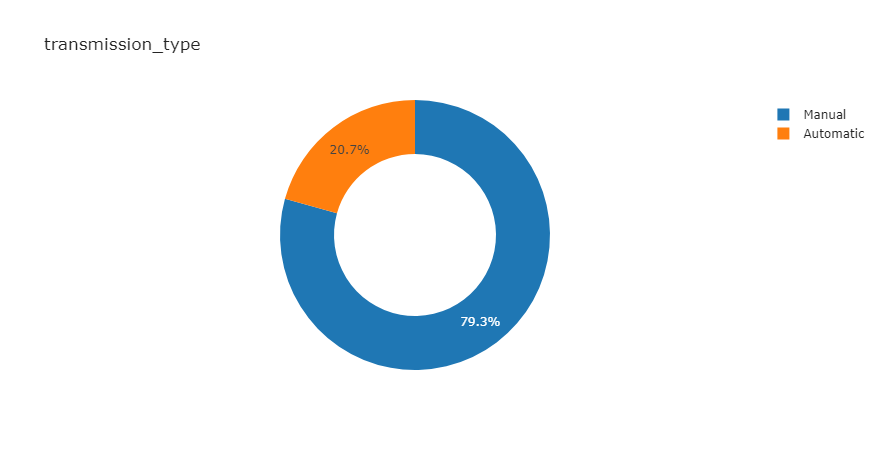

In [160]:
trans_df =df['transmission_type'].value_counts().reset_index()
trans_df.columns = ['Transmission_type','count']

px.pie(trans_df,values='count',names='Transmission_type',title='transmission_type',template='simple_white',width=550,height=450,hole=.60)

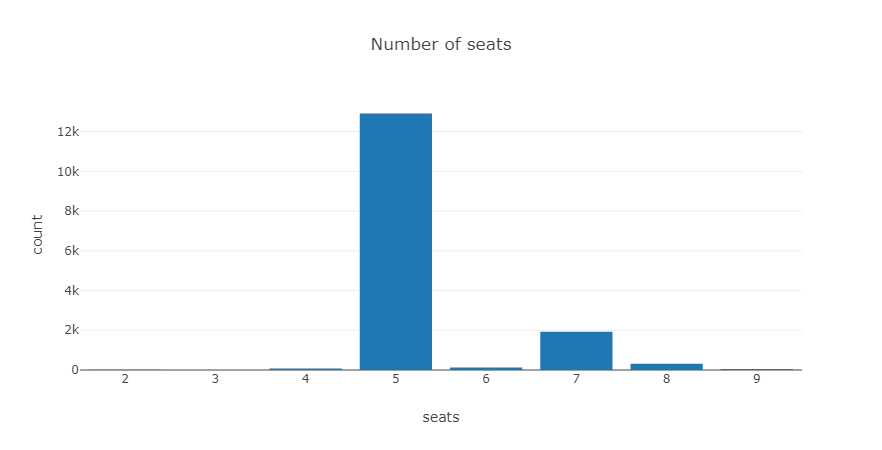

In [161]:
seats_df =df['seats'].value_counts().reset_index()
seats_df.columns = ['seats','count']
px.bar(seats_df,y='count',x='seats',title='Number of seats',template='none')

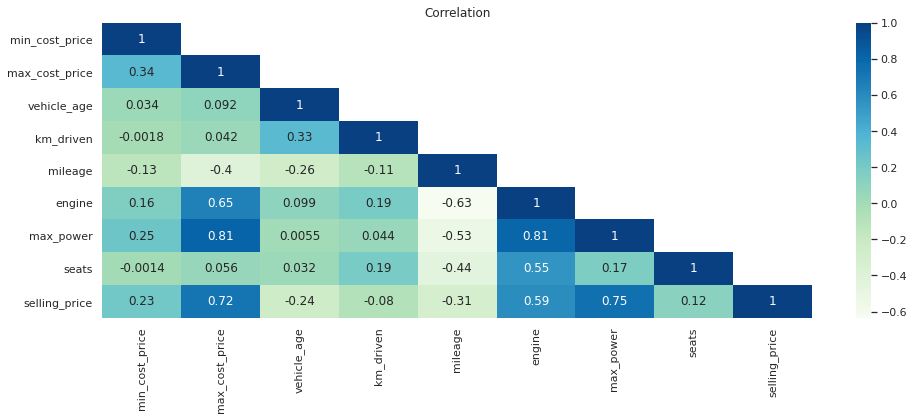

In [162]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True,cmap='GnBu',mask=np.triu(df.corr(),+1));
plt.title('Correlation');
plt.tight_layout()

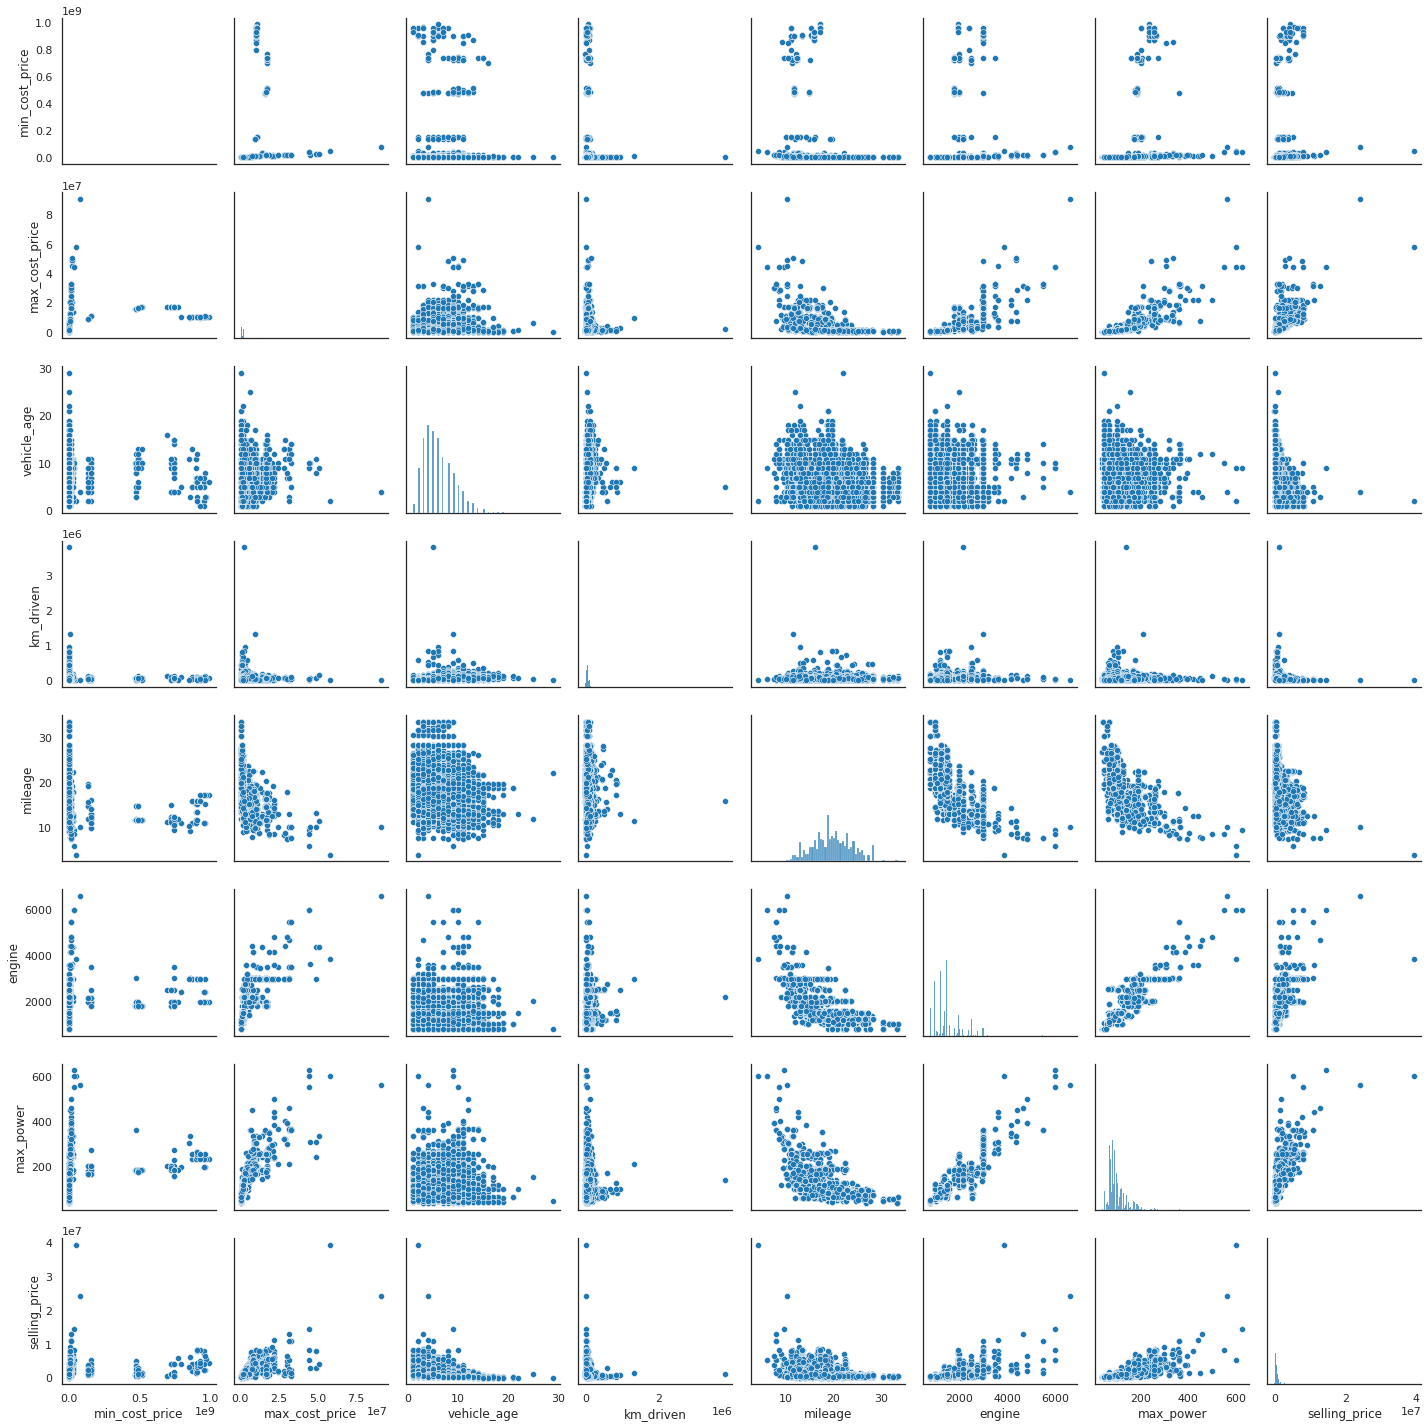

In [163]:
# pairplot
sns.set_context(context='notebook',font_scale=1)
sns.pairplot(df[num_cols]);
plt.tight_layout()

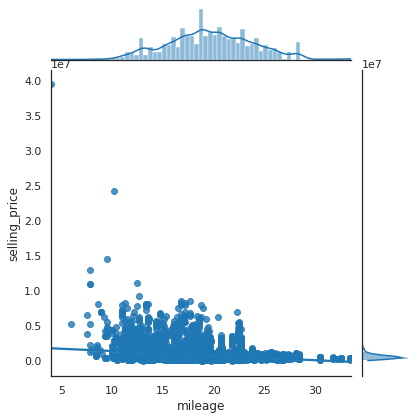

In [164]:
sns.jointplot(y=df['selling_price'], x=df['mileage'],kind='reg');

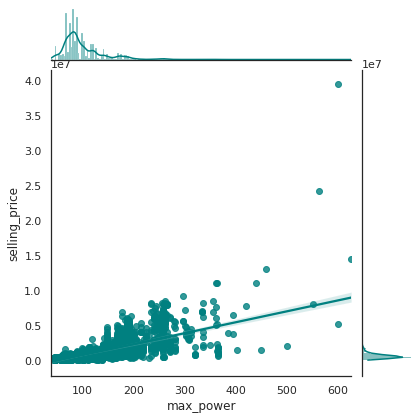

In [165]:
sns.jointplot(y=df['selling_price'], x=df['max_power'],kind='reg',color='#008080');

# Preprocessing

## i. Missing values

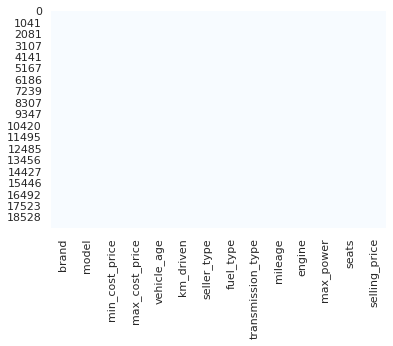

In [166]:
sns.heatmap(df.isnull(),cbar=False,cmap='Blues');

## ii. Data cleaning

In [167]:
def visual_check(df):
    """
    This function will print the unqiue values in each
    variable and return list of column with zeros and columns with special characters
    """

    counter = 0
    cols_with_zeros = []
    cols_need_check = []
    
    

    for feature in df.columns:

        counter += 1

        print('\n')
        print('***********************************************************')
        print(f'Col. NO.{counter} Column name: {feature}')
        print('***********************************************************')
        print(' ')
        print('1. Unique vlaues:',df[feature].unique())
        print(' ')


        try:

            print('2. Min values:',df[feature].min())
            print(' ')
            print('3. Max values:',df[feature].max())
            print(' ')
            print('4. no. unique:',df[feature].nunique())
            print(' ')
            print('5. value counts:')
            print(df[feature].value_counts(1)*100)
            print(' ')
            print('**************************************************')
            print('--------------------------------------------------')
            print('\n ')
            

            if df[feature].min()==0:
                               
                cols_with_zeros.append(feature)  

            else:
                continue
             
        except:
            cols_need_check.append(feature)
            print('min and max unsupported')
            

            
    return cols_with_zeros, cols_need_check

In [168]:
visual_check(df)



***********************************************************
Col. NO.1 Column name: brand
***********************************************************
 
1. Unique vlaues: ['Maruti' 'Hyundai' 'Ford' 'Renault' 'Mini' 'Mercedes-Benz' 'Toyota'
 'Volkswagen' 'Honda' 'Mahindra' 'Datsun' 'Tata' 'Kia' 'BMW' 'Audi'
 'Land Rover' 'Jaguar' 'MG' 'Isuzu' 'Porsche' 'Skoda' 'Volvo' 'Lexus'
 'Jeep' 'Maserati' 'Bentley' 'Nissan' 'ISUZU' 'Ferrari' 'Mercedes-AMG'
 'Rolls-Royce' 'Force']
 
2. Min values: Audi
 
3. Max values: Volvo
 
4. no. unique: 32
 
5. value counts:
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep       

([], [])

In [169]:
# duplicated values

dups = df.duplicated()
dups.sum()

105

In [170]:
df.drop_duplicates(inplace=True)

In [171]:
dups = df.duplicated()
dups.sum()

0

# data encoding

In [172]:
# encoding all categorical variables
cols_encode = ['brand','model','seller_type','fuel_type','transmission_type','seats']
target ='selling_price'


for col in cols_encode:
    print(col)
    
    # groupby categorical variable 
    gb_df=df.groupby(col)[target].median().reset_index()
    
    # rank based on the median price of the variable
    gb_df['rank'] = gb_df[target].rank(ascending=1,method='first').astype(int)
    
    # zip and save it in dictionary so we can map it
    name_dict = dict(zip(gb_df[col],gb_df['rank']))
    
    # encode the variable or column using dictionary 
    df[col]=df[col].map(name_dict)

df.head(4)

brand
model
seller_type
fuel_type
transmission_type
seats


,brand,model,min_cost_price,max_cost_price,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,3,2,357003.861004,4.654015e+05,9,120000,1,3,1,19.70,796,46.3,1,120000
1,5,19,711000.000000,7.480000e+05,5,20000,1,3,1,18.90,1197,82.0,1,550000
2,5,33,854082.865169,1.307926e+06,11,60000,1,3,1,17.00,1197,80.0,1,215000
3,3,2,357003.861004,4.654015e+05,9,37000,1,3,1,20.92,998,67.1,1,226000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15306 entries, 0 to 19543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15306 non-null  int64  
 1   model              15306 non-null  int64  
 2   min_cost_price     15306 non-null  float64
 3   max_cost_price     15306 non-null  float64
 4   vehicle_age        15306 non-null  int64  
 5   km_driven          15306 non-null  int64  
 6   seller_type        15306 non-null  int64  
 7   fuel_type          15306 non-null  int64  
 8   transmission_type  15306 non-null  int64  
 9   mileage            15306 non-null  float64
 10  engine             15306 non-null  int64  
 11  max_power          15306 non-null  float64
 12  seats              15306 non-null  int64  
 13  selling_price      15306 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.8 MB


# outliers

In [174]:
def treat_outlier(x):
    sorted(x)
    q1,q3= np.percentile(x,[25,75])
    IQR= q3-q1
    lowerlimit = q1-1.5*IQR
    upperlimit = q3 +1.5*IQR
    return lowerlimit,upperlimit

In [175]:
num_col = ['min_cost_price', 'max_cost_price','vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power']

for column in df[num_col].columns:
    lr,ur=treat_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

# Data split

In [176]:
# variable
X = df.drop(['selling_price'],axis=1)
y= df.pop('selling_price')

In [177]:
# data split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# iv. Scaling

In [178]:
"""
# scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""

'\n# scaling\n\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

In [179]:
#""" for independent variable

pot =PowerTransformer()    
X_train = pot.fit_transform(X_train)
X_test = pot.transform(X_test)

# for dependent variable

p_y = PowerTransformer()
y_train=p_y.fit_transform(y_train.to_frame())
y_test=p_y.transform(y_test.to_frame())
#"""

# predictive modelling

In [180]:
from sklearn import metrics


def metrics_view(X_test, y_test, X_train, y_train, model):
    
    # R_sqare on test set
    R2_test = model.score(X_test,y_test)
    R2_train = model.score(X_train, y_train)

    # model metrics
    reg_predict_test = model.predict(X_test)
    reg_predict_train= model.predict(X_train)

    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,reg_predict_test))
       
    
    print('Root Mean Square Error on test  :',RMSE_test)
    print('R_square on Test set :',R2_test)
    print('R_square on Train set :',R2_train)
    

# linear regression

In [181]:
# linear regression

# model
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)

# validate on test
metrics_view(X_test, y_test, X_train, y_train, LR_model)

Root Mean Square Error on test  : 0.3735538606159746
R_square on Test set : 0.8600112053339788
R_square on Train set : 0.8665060275382861


# Random Forest

In [182]:
# model
RF_model =RandomForestRegressor(n_estimators=600,max_depth=7)
RF_model.fit(X_train,y_train)

# validate on test
metrics_view(X_test,y_test,X_train,y_train,RF_model)

Root Mean Square Error on test  : 0.2783099441850164
R_square on Test set : 0.9222958410049292
R_square on Train set : 0.9338958699616164


# Bagging regressor

In [183]:
# model
BR_model =BaggingRegressor()
BR_model.fit(X_train,y_train)

# validate on test
metrics_view(X_test,y_test,X_train,y_train,BR_model)

Root Mean Square Error on test  : 0.2703809342570521
R_square on Test set : 0.9266603311581101
R_square on Train set : 0.9857230966014009


In [184]:
from sklearn.ensemble import AdaBoostRegressor

Adaboost = AdaBoostRegressor(random_state=101)
Adaboost.fit(X_train,y_train)

# validate on test
metrics_view(X_test,y_test,X_train,y_train,Adaboost)

Root Mean Square Error on test  : 0.4100110542969368
R_square on Test set : 0.8313532611103691
R_square on Train set : 0.8405953104299692


In [185]:
from sklearn.ensemble import  GradientBoostingRegressor

gradboost = GradientBoostingRegressor()
gradboost.fit(X_train,y_train)

# validate on test
metrics_view(X_test,y_test,X_train,y_train,gradboost)

Root Mean Square Error on test  : 0.2734314273241905
R_square on Test set : 0.9249961295639514
R_square on Train set : 0.9359247820938711


In [197]:
prediction =RF_model.predict(X_test)
prediction

array([ 0.61296348,  0.86072038,  0.3080727 , ...,  0.10074958,
        0.68711023, -0.39396318])

In [200]:
p_y.inverse_transform(prediction.reshape(-1, 1))

array([[ 855729.56570867],
       [1027730.00578596],
       [ 688945.25300066],
       ...,
       [ 597524.51303434],
       [ 903328.9254741 ],
       [ 431901.11499764]])

In [ ]:
#import pickle

#with open('RF_model.pkl','wb') as f:
    #pickle.dump(RF_model,f)



In [ ]:
#with open('RF_model.pkl','rb') as model:
    #test_model = pickle.load(model)
    
#test_model.score(X_test,y_test)